In [18]:
from sklearn.datasets import make_regression
from sklearn import linear_model

%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

import numpy as np 

### Helper methods

In [19]:
def generate_linear_regression_problem(samples_num):
    bias = np.random.uniform(-5, 5)
    data_noise = np.random.uniform(4, 8)
    x_values, y_values = make_regression(n_samples=samples_num, n_features=1, noise=data_noise, bias=bias)
    return x_values, y_values.reshape(-1, 1)

### Generate problem

In [20]:
samples_num = 100

In [21]:
x_values, y_values = generate_linear_regression_problem(samples_num)

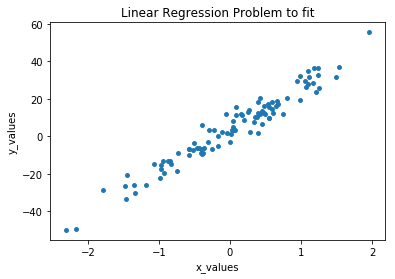

In [22]:
# Presenting generated data
plt.scatter(x_values, y_values, s=15)
plt.title("Linear Regression Problem to fit")
plt.xlabel("x_values")
plt.ylabel("y_values")
plt.show()

### Raw solution

Calculating cost function as Mean Squared Errors:

\begin{equation*}
 MSE   = \frac{1}{2m} \sum_{i=1}^m (h_{\theta}(x_i) - y_i)^2
\end{equation*}

where:
 - x - input to classifier
 - y - ideal output for given x
 - θ - weight for x representing feature
 - m - number of all samples 
 - i - index of sample

In [23]:
def mean_squared_errors(X, y, theta):
    samples_num = len(X)
    predictions = np.dot(X, theta)
    square_error = np.sum(np.square(predictions - y))
    return square_error / (2 * samples_num)

Gradient descent for used (above) MSE equation.

Repeat until model converges:

\begin{equation*}
 \theta_0 = \theta_0 - \alpha\frac{1}{m}\sum_{i=1}^m (h_{\theta}(x_i) - y_i)x_0
\end{equation*}
\begin{equation*}
 \theta_1 = \theta_1 - \alpha\frac{1}{m}\sum_{i=1}^m (h_{\theta}(x_i) - y_i)x_1
\end{equation*}

\begin{equation*}
 ...
\end{equation*}

\begin{equation*}
 \theta_n = \theta_n - \alpha\frac{1}{m}\sum_{i=1}^m (h_{\theta}(x_i) - y_i)x_n
\end{equation*}

where:
 - α - learning rate
 - x - input to classifier
 - y - ideal output for given x
 - θ - weight for x representing feature
 - m - number of all samples 
 - i - index of sample

In [24]:
def gradient_descent(X, y, theta, iterations, learning_rate):
    # Container for error from each gradient step
    error_history = []
    
    # Calculating initial error and saving it
    initial_error = mean_squared_errors(X, y, theta)
    error_history.append(initial_error)
    
    # Performing gradient step 'iterations' times
    for i in range(0, iterations):
        
        # Updating theta values
        theta = gradient_step(X, y, theta, learning_rate)
        
        # Calculating and saving error from current gradient step
        error = mean_squared_errors(X, y, theta)
        error_history.append(error)
        
        # Displaying train progress
        if i % 100 == 0:
            print("Iteration no. " + str(i) + ", error: " + str(error))
        
    return theta, error_history

In [25]:
# Vector implementation (without using loops) of gradient equations above
def gradient_step(X, y, theta, learning_rate):
    theta_num = len(theta)
    samples_num = len(X)
    predictions = np.dot(X, theta)
    grad_delta = (1 / samples_num) * np.dot(X.T, predictions - y)
    theta = theta - learning_rate * grad_delta
    return theta

Training Model

\begin{equation*}
 h(x) = \theta_0 + \theta_1x
\end{equation*}

In [26]:
# Adding bias column (column of ones) to input values
bias = np.ones(len(x_values))
X = np.column_stack((bias, x_values))

# Specifying ideal outputs
y = y_values

In [27]:
# Parameters for model
theta = np.zeros((X.shape[1], 1))

Training

In [28]:
# Hyperparameters
learning_rate = 0.001
iterations = 5000

In [29]:
# Performing gradient descent
trained_theta, error_history = gradient_descent(X, y, theta, iterations, learning_rate)

Iteration no. 0, error: 193.098664735
Iteration no. 100, error: 168.025693856
Iteration no. 200, error: 146.419239095
Iteration no. 300, error: 127.793841379
Iteration no. 400, error: 111.733104586
Iteration no. 500, error: 97.8796850099
Iteration no. 600, error: 85.9267632135
Iteration no. 700, error: 75.6107735598
Iteration no. 800, error: 66.7052015836
Iteration no. 900, error: 59.0152887548
Iteration no. 1000, error: 52.3735088758
Iteration no. 1100, error: 46.6357011657
Iteration no. 1200, error: 41.6777626203
Iteration no. 1300, error: 37.3928170321
Iteration no. 1400, error: 33.6887905443
Iteration no. 1500, error: 30.4863341739
Iteration no. 1600, error: 27.7170426589
Iteration no. 1700, error: 25.3219265499
Iteration no. 1800, error: 23.2501008621
Iteration no. 1900, error: 21.4576590343
Iteration no. 2000, error: 19.9067055473
Iteration no. 2100, error: 18.5645244624
Iteration no. 2200, error: 17.4028644694
Iteration no. 2300, error: 16.3973238548
Iteration no. 2400, error: 1

In [30]:
trained_theta

array([[  3.84532231],
       [ 21.47984029]])

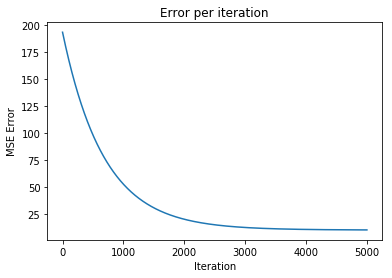

In [31]:
# Model learning history
plt.plot(error_history)
plt.title("Error per iteration")
plt.ylabel('MSE Error')
plt.xlabel('Iteration')
plt.show()

In [32]:
def hypothesis(x, trained_theta):
    return trained_theta[0][0] + trained_theta[1][0] * x

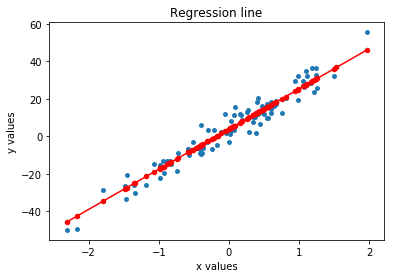

In [33]:
# Displaying dataset
plt.scatter(x_values, y_values, s=15)

# Displaying aproximated function
min_x = np.min(x_values)
max_x = np.max(x_values)
function_x = np.arange(min_x, max_x, 0.01)
function_y = [hypothesis(x, trained_theta) for x in function_x]
plt.plot(function_x, function_y, c="red")

# Displaying predicted values
y_predicted = np.dot(X, trained_theta)
plt.scatter(x_values, y_predicted, s=20, c='red')

plt.title("Regression line")
plt.ylabel("y values")
plt.xlabel("x values")
plt.show()

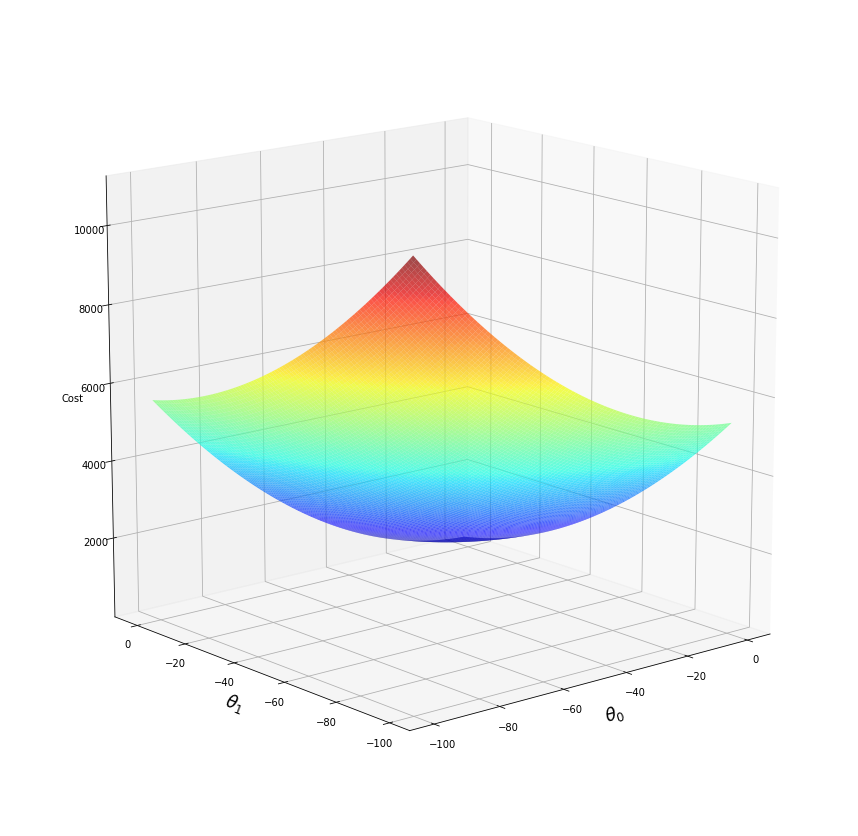

In [34]:
# Specify ranges for cost grid calculation
theta0_rounded = int(round(trained_theta[0][0]))
theta1_rounded = int(round(trained_theta[1][0]))
theta0_linspace = np.linspace(-100, theta0_rounded/10, 100)
theta1_linspace = np.linspace(-100, theta1_rounded/10, 100)

theta0_linspace_values, theta1_linspace_values = np.meshgrid(theta0_linspace, theta1_linspace, indexing='xy')
theta_cost_grid = np.zeros((theta0_linspace.size, theta1_linspace.size))

# Calculate cost values for every point of grid
for (i,j),v in np.ndenumerate(theta_cost_grid):
    theta_cost_grid[i,j] = mean_squared_errors(X, y, [[theta0_linspace_values[i,j]], [theta1_linspace_values[i,j]]])

# Creating figure
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

# Displaying plot
ax.plot_surface(theta0_linspace_values, theta1_linspace_values, theta_cost_grid, rstride=1, cstride=1, alpha=0.7, cmap=plt.cm.jet)
ax.set_zlabel('Cost')
ax.set_zlim(theta_cost_grid.min(), theta_cost_grid.max())
ax.view_init(elev=15, azim=230)

# Labels
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)